# Lezione 24 - Mettere assieme i dati

In questa lezione vedremo

* La nozione di **database relazionale**.
* Come leggere **dati geografici** (per l'esame).
* Come **unire dati** provenienti da tabelle diverse con pandas e geopandas
* Come **analizzare dati** in basi a chiavi di ricerca (group-by)

# Esame: analisi dati provinciali di Trento


Dataset provenienti dall'edizione 2014 della Telecom Italia Big Data Challenge.



* dati meteo
* dati elettrici
* SMS inviati/ricevuti
* chiamate inviate/ricevute
* traffico internet
* News da TrentoToday

I datasets sono spiegati in dettaglio in questo [articolo](https://www.nature.com/articles/sdata201555) di Barlacchi et al. su Nature Data.

# I dati hanno le seguenti caratteristiche generali



<center>
<img src="./immagini/mappe_trento.jpg" width="450">
</center>

* griglia con risoluzione variabile
* Risoluzione temporale di 10 minuti

-----------

<- Immagine adattata da [Barlacchi et al](https://www.nature.com/articles/sdata201555)



# Noi useremo solo i dati social pulse, meteo, energia + dati APPA

<center>
<img src="./immagini/mappe_trento.jpg" width="450">
</center>

* Consumi elettrici
* Dati sulle linee elettriche
* Dati capannine meteo 
* Dati precipitazioni
* Dati 'social pulse' di twitter.
* Dati [qualità aria APPA](http://www.appa.provincia.tn.it/aria/qualita_aria_sezione/)
----

I dati sono disponibili su [Harvard Dataverse](https://dataverse.harvard.edu/dataverse/bigdatachallenge?q=&types=dataverses%3Adatasets&sort=dateSort&order=desc&page=2) e sono rilasciati sotto [licenza ODBL (Open DataBase License)](https://en.wikipedia.org/wiki/Open_Database_License).

----
Nota: non useremo i dati TelCom perché occupano più di 300 Gb.

Se volete giocarci sono sullo stesso sito, ma non sono richiesti per il progetto.

------
<- Immagine adattata da [Barlacchi et al](https://www.nature.com/articles/sdata201555)


# Impostazione dell'esame

<center>
<img src="./immagini/ilrestodelgufo.png" width="600">
</center>

<center>
<img src="./immagini/schneider_schoolglider_b.png" width="700">
</center>

Negli anni 30 si insegnava il volo lanciando i futuri piloti su piccoli alianti..

# Simulazione di volo: l'importante è prendere confidenza

<center>
<img src="./immagini/schneider_schoolglider_b.png" width="700">
</center>

(Per i piloti anche uscirne con le ossa sane o almeno l'aliante intero aveva una certa importanza) 

* Il voto sarà al 50% sulla teoria, 50% sul progetto.
* Mi interessa **come impostate il problema**. Non la bontà del modello.
* Per problemi tecnici con librerie e dubbi sui dati, potete usare il forum su moodle. 
* **Non** potete usare moodle per altre cose, tipo dubbi sulla matematica.
* Un progetto a scelta tra i 3 seguenti


# Problema A -- Inquinamento atmosferico 
Usando i dati geografici, meteo, dei consumi elettrici, twitter, ed il dataset APPA. 
* **EDA** Individuare trend in base a posizione geografica, ora del giorno, giorno della settimana per temperatura, forza del vento, fattori inquinanti. Studiare correlazioni.

Usando i dati di cui sopra, limitatamente ai giorni precedenti a quello da prevedere
* **classificazione** Prevedere l'indice di qualità dell'aria per le stazioni di rilevamento nel dataset APPA basandosi sui dati dei giorni precedenti.
* **Regressione** Prevedere la quantità di ozono, di pm10 e di pm2.5 in base ai dati dei giorni precedenti.

# Problema B  -- Consumi elettrici
Usare i dati geografici, meteo, twitter, ed elettrici. 
* **EDA** Individuare le zone con maggiori consumi e maggior variazioni e identificarle. Correlano con zone industriali/residenziali/etc?

Usando i dati di cui sopra, limitatamente ai giorni precedenti a quello da prevedere, e  alle fasce orarie 08:00 - 19:00 e 19:00 - 24:00. Argomentare se è possibile usare fasce più fini.
* **Classificazione** Cercare di prevedere le zone del territorio urbano di Trento con maggiori consumi nei giorni infrasettimanali.
* **Regressione** Cercare di prevedere i consumi di energia g per la provincia di Trento e per una zona a scelta tra comune di Trento e comune di Rovereto. 

# Problema C -- Social pulse
Usare i dati geografici, meteo, twitter, ed elettrici. 
* **EDA** analisi social pulse: trend geografici, orari, correlazioni con dati meteo (temperatura, precipitazioni, forza del vento).

Usando i dati di cui sopra, limitatamente ai giorni precedenti a quello da prevedere
* **regressione** Prevedere l'attività  su twitter a livello provinciale nelle fasce orarie 08:00 - 19:00 e 19:00 - 24:00. Ci sono fasce più "fini" che catturano buona parte dell'attività?
* **classificazione** Prevedere le circoscrizioni di Trento con maggiore attività su twitter nelle fasce orarie precedenti. Di nuovo, se possibile, ottenere fasce orarie più precise.

# Ultime note sull'esame

* Iniziate leggendo l'[articolo di Barlacchi et al.](https://www.nature.com/articles/sdata201555)
* Il dataset administrative_regions contiene i dati sui comuni.
* Usare il template del progetto visto nei giorni scorsi può aiutare a districarsi tra i dati.
* Se provate a usare i dati delle TelCom, il template diventa essenziale. Le chiamate sono 60 Files da ~5 Gb ognuno. Non potete analizzarle su un laptopsenza scrivere degli script automatici.
* Siete liberi di provare ad aggiungere dati se volete, basta che lo motiviate.



# Dati APPA
* [Indice di qualità dell'aria](http://www.appa.provincia.tn.it/aria/qualita_aria_sezione/Indice_qualita_aria/)
* [Istruzioni](https://bollettino.appa.tn.it/aria/scarica/9)  per scaricare i dati APPA. Su linux si usa `wget url -O filename.csv` dove la `url` è quella specificata sul sito APPA. In Python potete usare `urllib`, vedere scripts per MNIST.

# Database relazionali - Alcuni cenni

I dati in generale sono contenuti in database (DB) in formato binario e non in singole tabelle,  
che vengono estratte in un secondo momento.

Capire alcuni concetti base di come sono strutturati questi DB ci può aiutare a collegare assieme dati contenuti in sets diversi.

Il linguaggio più usato è [SQL](https://www.khanacademy.org/computing/computer-programming/sql).

# I DB sono file binari a cui si accede tramite un interfaccia di comunicazione

<center>
<img src="./immagini/dbms.jpg" width="850">
</center>

# Ogni DB contiene dati raccolti in tabelle (relazioni)

<center>
<img src="./immagini/tabella_elettricità.jpg" width="900">
</center>


# Le righe sono Uniche (la tabella è un set)

<center>
<img src="./immagini/records_attributi.jpg" width="900">
</center>


# Ogni riga ha una chiave primaria univoca
<center>
<img src="./immagini/chiave_primaria.jpg" width="800">
</center>

# Le chiavi esterne ci permettono di unire le tabelle
<center>
<img src="./immagini/chiave_composta.jpg" width="800">
</center>

# Unire tabelle = unire insiemi
<center>
<img src="./immagini/sql_joins.png" width="800">
</center>

# Unire i DataFrame con Pandas
```python 
pd.merge() # fa le operazioni di SQL JOIN
Signature:
pd.merge(
    left,     # <-- DataFrame sx
    right,    # <-- DataFrame dx
    how: str = 'inner',   #<-- left, right, inner, outer
    on=None,      # <-- chiave comune 
    left_on=None,  # <-- chiave sx
    right_on=None,  # <-- chiave dx
    left_index: bool = False,
    right_index: bool = False,
    sort: bool = False,
    suffixes=('_x', '_y'),
    copy: bool = True,
    indicator: bool = False, # <-- se True dà informazioni utili per merge esclusivi!
    validate=None,  
) -> 'DataFrame'
```


# Aggregare i dati

SQL permette di fare operazioni statistiche in base al valore di una chiave secondaria (non univoca). 
Queste in pandas stanno nella funzione [groupby](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)

* Groupby usata in modo corretto permette di **guadagnare un fattore 10** o più in velocità!

# E in ambito fisico?

In fisica abbiamo a che fare con lunghissime serie temporali rappresentati un'acquisizione dati. 

Il formato relazionale rallenta le operazioni in questo caso, per cui si usano formati gerarchici come 
[HDF5](https://en.wikipedia.org/wiki/Hierarchical_Data_Format). 

# Impostiamo un po' di cose per comodità

In [1]:
from pathlib  import Path
data_path = Path('./data/raw')

files = {'grid':'trentino-grid.geojson',
         'adm_reg':'administrative_regions_Trentino.json',
        'weather':'meteotrentino-weather-station-data.json',
        'precip':'precipitation-trentino.csv',
        'precip-avail':'precipitation-trentino-data-availability.csv',
        'SET-1':'SET-nov-2013.csv',
        'SET-2':'SET-dec-2013.csv',
        'SET-lines':'line.csv',
        'twitter':'social-pulse-trentino.geojson'}

## Mappe

* [geopandas](https://geopandas.org/) permette di lavorare su dati geografici e fare statistiche su mappe.
* È basato su [shapely](https://pypi.org/project/Shapely/) una libreria per lavorare su forme geometriche planari.
* Potete fare varie operazioni, incluso verificare che una regione sia inclusa in un'altra.


In [2]:
import pandas as pd
import geopandas as gpd

df_grid = gpd.read_file(data_path / files['grid'])

# Geopandas aggiunge funzionalità a pandas
* `DataFrame` -> `GeoDataFrame`  (deve avere una colonna `geometry`)
* `DataSeries` - > `GeoDataSeries`

In [6]:
df_grid.head()

cellId                                           geometry
0      38  POLYGON ((10.91462 45.68201, 10.92746 45.68179...
1      39  POLYGON ((10.92746 45.68179, 10.94029 45.68157...
2      40  POLYGON ((10.94029 45.68157, 10.95312 45.68136...
3     154  POLYGON ((10.90209 45.69122, 10.91493 45.69100...
4     155  POLYGON ((10.91493 45.69100, 10.92777 45.69079...

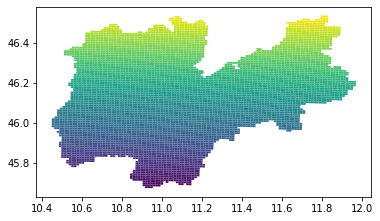

In [7]:
# usa 'geometry per la mappa'
df_grid.plot('cellId') 

# Attenzione: i file .json e .geojson non sempre hanno il formato giusto..


In [8]:
tweets = gpd.read_file( data_path / files['twitter'])

DriverError: Failed to read GeoJSON data

# Per capire il problema, vanno aperti con json!

In [9]:
import json
with open(data_path / files['twitter']) as f:
    tweets_json = json.load(f)

In [10]:
print(tweets_json.keys())
print(tweets_json['crs'])
print(tweets_json['type'])

dict_keys(['crs', 'type', 'features'])
{'type': 'name', 'properties': {'name': 'urn:ogc:def:crs:EPSG::4326'}}
SlicedDataCollection


Ecco il problema: contengono anche i metadati!

# Va estratta la parte delle features

In [11]:
tweets = gpd.GeoDataFrame(tweets_json['features'])
tweets.head()

created   timestamp        user  \
0  2013-11-01T00:04:16  1383260656  5fd4f31f75   
1  2013-11-01T00:01:14  1383260474  68c0e98182   
2  2013-11-01T00:43:03  1383262983  abe21fc052   
3  2013-11-01T00:38:37  1383262717  94d1efbbfd   
4  2013-11-01T00:45:40  1383263140  d261d03075   

                                     geomPoint.geom      municipality.name  \
0  {'type': 'Point', 'coordinates': [11.13, 46.07]}                 Trento   
1  {'type': 'Point', 'coordinates': [10.83, 46.23]}                Pinzolo   
2  {'type': 'Point', 'coordinates': [11.46, 46.29]}               Cavalese   
3  {'type': 'Point', 'coordinates': [11.04, 45.89]}               Rovereto   
4   {'type': 'Point', 'coordinates': [11.12, 46.2]}  San Michele all'Adige   

                               municipality.acheneID language  \
0  http://dandelion.eu/resource/05a192433bede90cd...       it   
1  http://dandelion.eu/resource/96e35a90e246ca017...       tl   
2  http://dandelion.eu/resource/01f847397f180d6c0...       en   
3  http://dandelion.eu/resource/1841c30a560050875...       it   
4  http://dandelion.eu/resource/32ca86fe3c8f5988a...       ru   

                                            entities  
0                                                 []  
1  [http://it.dbpedia.org/resource/Madonna_di_Cam...  
2  [http://dbpedia.org/resource/Coven, http://dbp...  
3                                                 []  
4            [http://it.dbpedia.org/resource/Rotari]

# Dobbiamo creare una colonna `geometry`

In [12]:
from shapely.geometry import Point
tweets['geometry'] = tweets['geomPoint.geom'].apply(lambda x:Point(x['coordinates'][0], x['coordinates'][1]))
tweets.drop(columns=['geomPoint.geom'],inplace=True)
tweets.head()

created   timestamp        user      municipality.name  \
0  2013-11-01T00:04:16  1383260656  5fd4f31f75                 Trento   
1  2013-11-01T00:01:14  1383260474  68c0e98182                Pinzolo   
2  2013-11-01T00:43:03  1383262983  abe21fc052               Cavalese   
3  2013-11-01T00:38:37  1383262717  94d1efbbfd               Rovereto   
4  2013-11-01T00:45:40  1383263140  d261d03075  San Michele all'Adige   

                               municipality.acheneID language  \
0  http://dandelion.eu/resource/05a192433bede90cd...       it   
1  http://dandelion.eu/resource/96e35a90e246ca017...       tl   
2  http://dandelion.eu/resource/01f847397f180d6c0...       en   
3  http://dandelion.eu/resource/1841c30a560050875...       it   
4  http://dandelion.eu/resource/32ca86fe3c8f5988a...       ru   

                                            entities  \
0                                                 []   
1  [http://it.dbpedia.org/resource/Madonna_di_Cam...   
2  [http://dbpedia.org/resource/Coven, http://dbp...   
3                                                 []   
4            [http://it.dbpedia.org/resource/Rotari]   

                    geometry  
0  POINT (11.13000 46.07000)  
1  POINT (10.83000 46.23000)  
2  POINT (11.46000 46.29000)  
3  POINT (11.04000 45.89000)  
4  POINT (11.12000 46.20000)

# Ora possiamo usare i plot di geopandas..



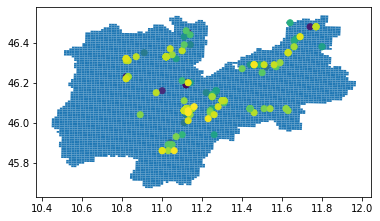

In [13]:
date_mask = (tweets['created'] > '2013-11-01') & (tweets['created'] < '2013-11-02')
ax = df_grid.plot()
tweets[date_mask].plot(column='timestamp',ax=ax)

# Esercizi
1. Caricare il dataset di Novembre con i consumi elettrici
2. Usare Groupby per calcolare il valore del consumo del mese su ogni linea elettrica (10 minuti)
3. Fare un merge del dataset `SET-nov-2013.csv` e di `lines.csv` e usare groupby per ottenere il consumo elettrico mensile mappato sull'intera provincia. (45 minuti). Ci sono valori mancanti dai merge? Perché? (usare indicator=True).
4. In caso di NaN bisogna decidere come trattarli. Si escludono? Si mettono ad un valore fisso (`pd.fillna()`)?

# Help
### Nel punto 3 conviene procedere come segue:
   - merge dei due datasets per collegare i consumi per linea alle celle geografiche.
   - groupby per ottenere dati aggregati per cella geografica. Salvarli come colonna..
   - merge con dataframe griglia
   - geopandas plot per  plottare i dati cosi ottenuti sulla griglia.
   - Nota: una linea elettrica può attraversare più celle. **I consumi vanno normalizzati!**
### Facendo i merge vanno controllati sempre i NaN
```python
row_has_nans = df.isnull().any(axis=1)
```

# Dovrebbe uscire qualcosa del genere

![consumi](./immagini/mappa_consumi_elettrici.png)

In [35]:
SET1 = pd.read_csv(data_path / files['SET-1'], names=['LINESET','TIMESTAMP','POWER'])

In [36]:
SET1.head()

LINESET         TIMESTAMP      POWER
0  DG1000420  2013-11-01 00:00  37.439999
1  DG1000420  2013-11-01 00:10  37.439999
2  DG1000420  2013-11-01 00:20  36.000000
3  DG1000420  2013-11-01 00:30  35.279999
4  DG1000420  2013-11-01 00:40  35.279999

In [37]:
grp = SET1.groupby(['LINESET'])
power = grp['POWER'].sum()

LINESET
DG1000420    252097.548815
DG1000421     98566.436039
DG1000422    115750.855065
DG1000423     73870.196743
DG1000425    141893.033643
Name: POWER, dtype: float64

In [56]:
lines = pd.read_csv(data_path / files['SET-lines'])
lines.head()

SQUAREID    LINESET  NR_UBICAZIONI
0       155  DG1031221              4
1       272  DG1031221             72
2       273  DG1031221             21
3       276  DG1003117             34
4       277  DG1003117              3

In [43]:
data = pd.merge(lines,power,on='LINESET',how='left',indicator='True')

In [49]:
data.isnull().any()

SQUAREID         False
LINESET          False
NR_UBICAZIONI    False
POWER             True
True             False
dtype: bool

In [55]:
data['POWER'].fillna(0, inplace=True)
data.isnull().any()

SQUAREID         False
LINESET          False
NR_UBICAZIONI    False
POWER            False
True             False
dtype: bool

In [57]:
data.head()


SQUAREID    LINESET  NR_UBICAZIONI          POWER  True
0       155  DG1031221              4  191174.595791  both
1       272  DG1031221             72  191174.595791  both
2       273  DG1031221             21  191174.595791  both
3       276  DG1003117             34  272989.008432  both
4       277  DG1003117              3  272989.008432  both

In [59]:
tot_ubic = lines.groupby(['LINESET'])['NR_UBICAZIONI'].sum()
tot_ubic.head()

LINESET
DG1000011       6
DG1000023      62
DG1000420    2133
DG1000421    1424
DG1000422    3423
Name: NR_UBICAZIONI, dtype: int64

In [61]:
df3 = pd.merge(data, tot_ubic, on='LINESET',how='inner')
df3['POWER_CELLID'] = df3['POWER']* df3['NR_UBICAZIONI_x'] / df3['NR_UBICAZIONI_y'] 
df3.head()

SQUAREID    LINESET  NR_UBICAZIONI_x          POWER  True  NR_UBICAZIONI_y  \
0       155  DG1031221                4  191174.595791  both             1380   
1       272  DG1031221               72  191174.595791  both             1380   
2       273  DG1031221               21  191174.595791  both             1380   
3       389  DG1031221               65  191174.595791  both             1380   
4       390  DG1031221                8  191174.595791  both             1380   

   POWER_CELLID  
0    554.129263  
1   9974.326737  
2   2909.178632  
3   9004.600526  
4   1108.258526

In [71]:
month_power_cell = data.groupby(['SQUAREID'])['POWER'].sum()

In [69]:
pwr_loc.head()

SQUAREID
155    191174.595791
272    191174.595791
273    191174.595791
276    272989.008432
277    272989.008432
Name: POWER, dtype: float64

In [70]:
df_grid = gpd.read_file(data_path / files['grid'])

In [79]:
map_power = pd.merge(df_grid, month_power_cell, left_on='cellId',right_on='SQUAREID', how='left') 

In [82]:

map_power['POWER'].fillna(0, inplace=True)
map_power.isnull().any()
map_power.head()

cellId                                           geometry          POWER
0      38  POLYGON ((10.91462 45.68201, 10.92746 45.68179...       0.000000
1      39  POLYGON ((10.92746 45.68179, 10.94029 45.68157...       0.000000
2      40  POLYGON ((10.94029 45.68157, 10.95312 45.68136...       0.000000
3     154  POLYGON ((10.90209 45.69122, 10.91493 45.69100...       0.000000
4     155  POLYGON ((10.91493 45.69100, 10.92777 45.69079...  191174.595791

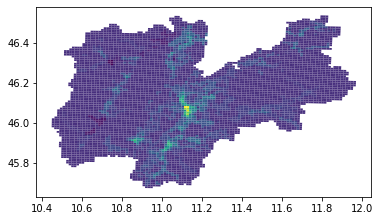

In [83]:
map_power.plot('POWER') 